# **Getting started with the data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
survival=df_train['Survived']
survival

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
df_train.drop('Survived',axis=1,inplace=True)

In [ ]:
train_pid=df_train['PassengerId']
test_pid=df_test['PassengerId']

In [ ]:
combined_df=pd.concat([df_train,df_test]).reset_index(drop=True)
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#**Handling missing values**

In [ ]:
combined_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014


#**Handling missing values in 'Age**

In [ ]:
# Working with 'Age'
y=combined_df['Age'].value_counts()
x=y.index.values

Text(0.5, 1.0, 'All Ages')

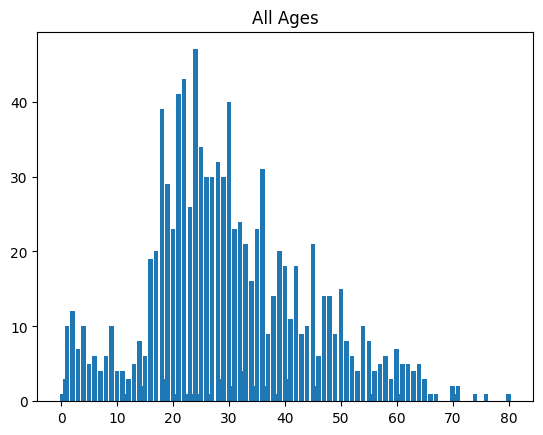

In [ ]:
plt.bar(x,y)
plt.title('All Ages')

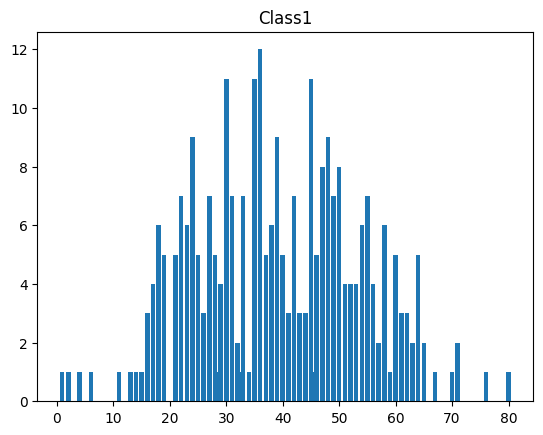

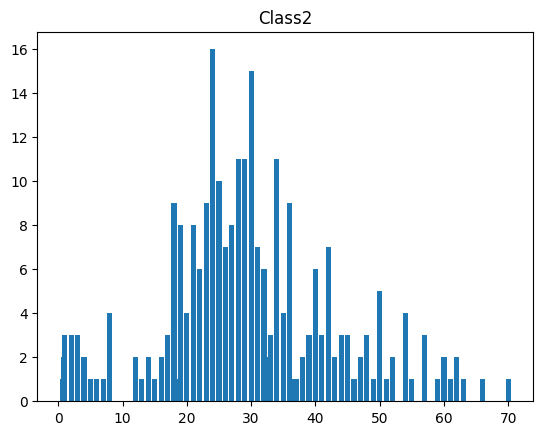

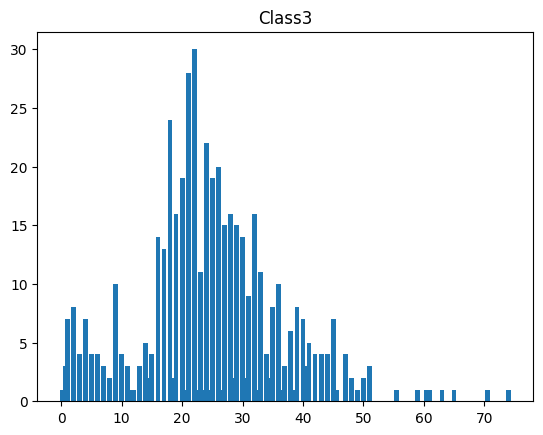

In [ ]:
# Analyzing the majority of the people in each class
class_age=combined_df[['Pclass','Age']]
for i in range(1,4):
  plt.title('Class'+str(i))
  y=class_age[class_age['Pclass']==i]['Age'].value_counts()
  x=y.index.values
  plt.bar(x,y)
  plt.show()

In [ ]:
# Gathering medians of all the Classes
median=class_age.groupby('Pclass').median()
median

,Age
Pclass,
1,39.0
2,29.0
3,24.0


In [ ]:
# Filling the NaN values in 'Age' using the median
for i in range(3):
  idx=np.where((combined_df['Pclass']==i+1) & (combined_df['Age'].isnull()))[0]
  combined_df.loc[idx,'Age']=median.values[i][0]
combined_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


# **Handling missing value in 'Fare' column**

In [ ]:
combined_df[combined_df['Fare'].isnull()]


#So from the below data we can observe that in the embarked
#column the value is S and also the passenger class is 3 so
#what we do here is compare similar Fares
 #and also we compare passenger class:3 and embarked:S
#that we get the median from the similar Fares'''


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
sim_fares=combined_df[(combined_df['Pclass']==3) & (combined_df['Embarked']=='S')]['Fare']
print("Median:",sim_fares.median())

Median: 8.05


<function matplotlib.pyplot.show(close=None, block=None)>

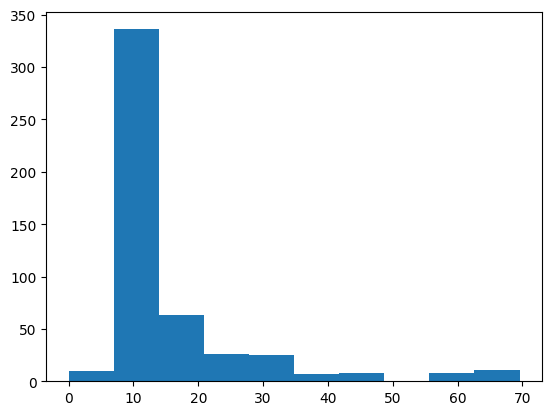

In [ ]:
plt.hist(sim_fares)
plt.show


#Now as we got a median we're going to plot a histogram

In [ ]:
combined_df['Fare']=combined_df['Fare'].fillna(sim_fares.median())

#Now we are going to fill the NaN values using the medium
#we have obtained the median in the above steps

In [ ]:
combined_df[combined_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#**Handling missing values in 'Embarked' column**


In [ ]:
combined_df[combined_df['Embarked'].isnull()]

#embarked column has two null values and these values
 #are respectively at the indices 61 and 829. Also,the fare
 #is equal and the Pclass is 1 and hence we are going to
 #use these features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
sim_emb=combined_df[(combined_df['Pclass']==1) & (combined_df['Fare']>70) & (combined_df['Fare']<=90)]['Embarked']
print(sim_emb.value_counts())

#Here we extracted all the embarked features with Pclass==1
#and fare in between 70-90 and hence in the as the output we obtain
#the c,s,q with highest values 29,25 and 23 and hence we
#use highest values 'C' to fill the missing values in the embarked column

Embarked
C    29
S    25
Q     3
Name: count, dtype: int64


In [ ]:
combined_df['Embarked']=combined_df['Embarked'].fillna('C')
combined_df[combined_df['Embarked'].isnull()]
#missing values are handled

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# **Handling missing value in 'Cabin' column**

In [ ]:
combined_df['Cabin']=combined_df['Cabin'].fillna('M')

In [ ]:
combined_df['Cabin']=combined_df['Cabin'].str[0]

In [ ]:
combined_df['Cabin'].value_counts()
#The missing 1014 values are filled with 'M'

,count
Cabin,
M,1014
C,94
B,65
D,46
E,41
A,22
F,21
G,5
T,1


In [ ]:
idx=np.where(combined_df['Cabin']=='T')[0]
combined_df.loc[idx,'Cabin']='M'

In [ ]:
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


In [ ]:
combined_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


**Key notes:**

1)Here we changed cabin numbers from B28 to B

2)we are just obtaining the alphabet that represents the floor on the titanic

#**Feature Engineering**

In [ ]:
combined_df.nunique()

,0
PassengerId,1309
Pclass,3
Name,1307
Sex,2
Age,98
SibSp,7
Parch,8
Ticket,929
Fare,281
Cabin,8


In [ ]:
names=combined_df['Name']
last_names=[]
titles=[]
first_names=[]

In [ ]:
names = combined_df['Name']
last_names = []
titles = []
first_names = []

for name in names:
    if ',' not in name:
        last_names.append('')
        # Handle names without a comma (likely don't have a title or first name in the expected format)
        titles.append('')
        first_names.append('')
    else:
        last, rest_of_name = name.split(',', 1)
        last_names.append(last.strip())
        # Use strip to remove potential whitespace

        if '.' not in rest_of_name:
            titles.append('')
            first_names.append(rest_of_name.strip())
        else:
            title_part, first_part = rest_of_name.split('. ', 1)
            # Extract title from the title_part
            title = title_part.strip().split(' ')[-1]
            # Assuming the title is the last word before the '.'
            titles.append(title)
            first_names.append(first_part.strip())

last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)

np.unique(titles, return_counts=True)


#Since there are a lot of names we are obtaining the first names in one column

(array(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady',
        'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev',
        'Sir'], dtype='<U8'),
 array([  1,   4,   1,   1,   1,   8,   1,   1,   2,  61, 260,   2,   1,
        757, 197,   2,   8,   1]))

In [ ]:
idx=np.where(np.isin(titles,['Capt','Col','Major']))
titles[idx]='Military'
np.unique(titles,return_counts=True)
#We created a separate column-military for ease
#this column consists of names like [Capt,Col,Major]

(array(['Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Master',
        'Military', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
       dtype='<U8'),
 array([  1,   1,   1,   8,   1,   1,  61,   7, 260,   2,   1, 757, 197,
          2,   8,   1]))

In [ ]:
idx=np.where(np.isin(titles,['Don','Dona','Lady','Countess','Jonkheer','Sir','Master']))
titles[idx]='Nobility'
np.unique(titles,return_counts=True)

(array(['Dr', 'Military', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms',
        'Nobility', 'Rev'], dtype='<U8'),
 array([  8,   7, 260,   2,   1, 757, 197,   2,  67,   8]))

In [ ]:
idx=np.where(np.isin(titles,['Miss','Mlle','Ms']))
titles[idx]='Ms'
np.unique(titles,return_counts=True)
idx=np.where(np.isin(titles,['Mrs','Mme']))
titles[idx]='Mrs'
np.unique(titles,return_counts=True)

(array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
       dtype='<U8'),
 array([  8,   7, 757, 198, 264,  67,   8]))

In [ ]:
combined_df['Title']=titles
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr


In [ ]:
print(combined_df['Age'].min(),combined_df['Age'].max())

0.17 80.0


In [ ]:
bins = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])
combined_df['Age_Bin'] = pd.cut(combined_df['Age'], bins, right=False)
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"[20, 30)"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"[30, 40)"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"[20, 30)"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"[30, 40)"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"[30, 40)"


In [ ]:
ticket_dict=dict(combined_df['Ticket'].value_counts())

In [ ]:
combined_df['tck_count']=combined_df['Ticket'].map(ticket_dict)
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tck_count
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"[20, 30)",1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"[30, 40)",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"[20, 30)",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"[30, 40)",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"[30, 40)",1


In [ ]:
combined_df['fare_per_ticket']=combined_df['Fare']/combined_df['tck_count']
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tck_count,fare_per_ticket
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"[20, 30)",1,7.25000
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"[30, 40)",2,35.64165
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"[20, 30)",1,7.92500
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"[30, 40)",2,26.55000
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"[30, 40)",1,8.05000


<BarContainer object of 260 artists>

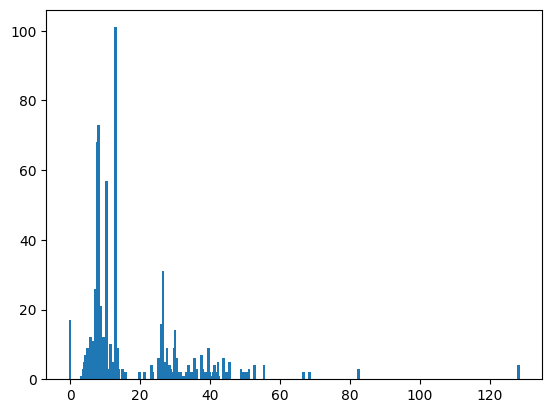

In [ ]:
plt.bar(combined_df['fare_per_ticket'].value_counts().index.values,combined_df['fare_per_ticket'].value_counts())


In [ ]:
print(combined_df['fare_per_ticket'].min(),combined_df['fare_per_ticket'].max())


0.0 128.0823


In [ ]:
bins = np.array([0,20,40,60,80,150])
combined_df['Fare_Bin'] = pd.cut(combined_df['fare_per_ticket'], bins, right=False)
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tck_count,fare_per_ticket,Fare_Bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"[20, 30)",1,7.25000,"[0, 20)"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"[30, 40)",2,35.64165,"[20, 40)"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"[20, 30)",1,7.92500,"[0, 20)"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"[30, 40)",2,26.55000,"[20, 40)"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"[30, 40)",1,8.05000,"[0, 20)"


In [ ]:
combined_df['num_family']=combined_df['SibSp']+combined_df['Parch']+1
combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,tck_count,fare_per_ticket,Fare_Bin,num_family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"[20, 30)",1,7.25000,"[0, 20)",2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"[30, 40)",2,35.64165,"[20, 40)",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"[20, 30)",1,7.92500,"[0, 20)",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"[30, 40)",2,26.55000,"[20, 40)",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"[30, 40)",1,8.05000,"[0, 20)",1


In [ ]:
combined_df.drop(['Name','Age','Ticket','Fare','tck_count','fare_per_ticket'],axis=1,inplace=True)

In [ ]:
combined_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,num_family
0,1,3,male,1,0,M,S,Mr,"[20, 30)","[0, 20)",2
1,2,1,female,1,0,C,C,Mrs,"[30, 40)","[20, 40)",2
2,3,3,female,0,0,M,S,Ms,"[20, 30)","[0, 20)",1
3,4,1,female,1,0,C,S,Mrs,"[30, 40)","[20, 40)",2
4,5,3,male,0,0,M,S,Mr,"[30, 40)","[0, 20)",1


In [ ]:
combined_df.nunique()

,0
PassengerId,1309
Pclass,3
Sex,2
SibSp,7
Parch,8
Cabin,8
Embarked,3
Title,7
Age_Bin,8
Fare_Bin,5


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
combined_df.set_index('PassengerId',inplace=True)

In [ ]:
combined_df.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,num_family
PassengerId,,,,,,,,,,
1,3,male,1,0,M,S,Mr,"[20, 30)","[0, 20)",2
2,1,female,1,0,C,C,Mrs,"[30, 40)","[20, 40)",2
3,3,female,0,0,M,S,Ms,"[20, 30)","[0, 20)",1
4,1,female,1,0,C,S,Mrs,"[30, 40)","[20, 40)",2
5,3,male,0,0,M,S,Mr,"[30, 40)","[0, 20)",1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=combined_df.copy()
le=le.astype(str)
le=le.apply(LabelEncoder().fit_transform)
#The LabelEncoder() gives a unique identifier to the strings
display(le)

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,num_family
PassengerId,,,,,,,,,,
1,2,1,1,0,7,2,2,2,0,2
2,0,0,1,0,2,0,3,3,1,2
3,2,0,0,0,7,2,4,2,0,0
4,0,0,1,0,2,2,3,3,1,2
5,2,1,0,0,7,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...
1305,2,1,0,0,7,2,2,2,0,0
1306,0,0,0,0,2,0,5,3,1,0
1307,2,1,0,0,7,2,2,3,0,0


In [ ]:
one_hot=le.copy()
display(one_hot)

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare_Bin,num_family
PassengerId,,,,,,,,,,
1,2,1,1,0,7,2,2,2,0,2
2,0,0,1,0,2,0,3,3,1,2
3,2,0,0,0,7,2,4,2,0,0
4,0,0,1,0,2,2,3,3,1,2
5,2,1,0,0,7,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...
1305,2,1,0,0,7,2,2,2,0,0
1306,0,0,0,0,2,0,5,3,1,0
1307,2,1,0,0,7,2,2,3,0,0


In [ ]:
one_hot=pd.get_dummies(one_hot,columns=['Sex','Embarked','Title'],dtype=int)
display(one_hot)

,Pclass,SibSp,Parch,Cabin,Age_Bin,Fare_Bin,num_family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,2,3,1,2,1,0,1,0,0,0,0,0,1,0,0,0
3,2,0,0,7,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0,2,3,1,2,1,0,0,0,1,0,0,0,1,0,0,0
5,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,0,0,7,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1306,0,0,0,2,3,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1307,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
x=one_hot.loc[train_pid].values
y=survival.values
scaler=MinMaxScaler()
scaler.fit(x)
x_scaled=scaler.fit_transform(x)

In [74]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=0)

# Define a smaller parameter grid for demonstration
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Use RandomizedSearchCV for hyperparameter tuning
xgb_rand_search = RandomizedSearchCV(xgb_clf, xgb_params, scoring='accuracy', random_state=0, cv=5)
xgb_rand_search.fit(x_train, y_train)

print("Best XGBoost parameters:", xgb_rand_search.best_params_)
print("XGBoost Train Acc:", xgb_rand_search.best_score_)

xgb_preds = xgb_rand_search.predict(x_test)
print("XGBoost Test Acc:", accuracy_score(xgb_preds, y_test))

Best XGBoost parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost Train Acc: 0.8286417807544566
XGBoost Test Acc: 0.8268156424581006
